# Handling Gaps in Time Series Data

## Imports and data loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_style('darkgrid')

from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('daily_sample.csv')

In [3]:
df.head(100)

,date,value
0,10/1/2021,1
1,10/5/2021,2
2,10/6/2021,3
3,10/7/2021,4
4,10/10/2021,5


## Date Index Set

In [4]:
def set_date_index(input_df, col_name='date'):
    """Given a pandas df, parse and set date column to index.
        col_name will be removed and set as datetime index.

    Args:
        input_df (pandas dataframe): Original pandas dataframe
        col_name (string): Name of date column

    Returns:
        pandas dataframe: modified and sorted dataframe
    """
    # Copy df to prevent changing original
    modified_df = input_df.copy()

    # Infer datetime from col
    modified_df[col_name] = pd.to_datetime(modified_df[col_name])

    # Sort and set index
    modified_df.sort_values(col_name, inplace=True)
    modified_df.set_index(col_name, inplace=True)

    return modified_df

In [5]:
df = set_date_index(df)

In [6]:
df.head()

,value
date,
2021-10-01,1
2021-10-05,2
2021-10-06,3
2021-10-07,4
2021-10-10,5


In [7]:
def plot_ts_data(plot_df):
    # Plot 
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.pointplot(x=plot_df.index, y=plot_df.value, ax=ax)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))

## Resample - No Handling

In [8]:
df_no_handling = df.resample('1D').mean()
df_no_handling

,value
date,
2021-10-01,1.0
2021-10-02,NaN
2021-10-03,NaN
2021-10-04,NaN
2021-10-05,2.0
2021-10-06,3.0
2021-10-07,4.0
2021-10-08,NaN
2021-10-09,NaN


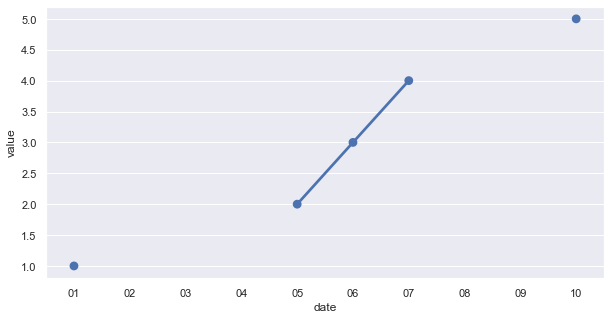

In [9]:
plot_ts_data(df_no_handling)

## Resample - Forward Fill

In [10]:
df_ffill = df.resample('1D').mean().ffill()
df_ffill

,value
date,
2021-10-01,1.0
2021-10-02,1.0
2021-10-03,1.0
2021-10-04,1.0
2021-10-05,2.0
2021-10-06,3.0
2021-10-07,4.0
2021-10-08,4.0
2021-10-09,4.0


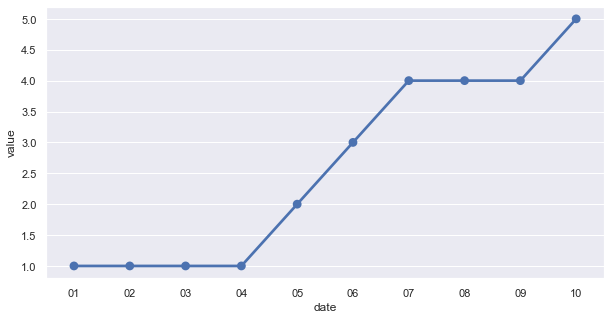

In [11]:
plot_ts_data(df_ffill)

## Resample - Backward Fill

In [12]:
df_bfill = df.resample('1D').mean().bfill()
df_bfill

,value
date,
2021-10-01,1.0
2021-10-02,2.0
2021-10-03,2.0
2021-10-04,2.0
2021-10-05,2.0
2021-10-06,3.0
2021-10-07,4.0
2021-10-08,5.0
2021-10-09,5.0


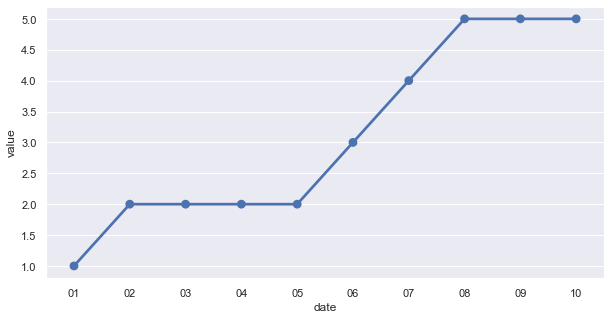

In [13]:
plot_ts_data(df_bfill)

## Resample - Interpolate

In [14]:
df_interpolate = df.resample('1D').mean().interpolate()
df_interpolate

,value
date,
2021-10-01,1.000000
2021-10-02,1.250000
2021-10-03,1.500000
2021-10-04,1.750000
2021-10-05,2.000000
2021-10-06,3.000000
2021-10-07,4.000000
2021-10-08,4.333333
2021-10-09,4.666667


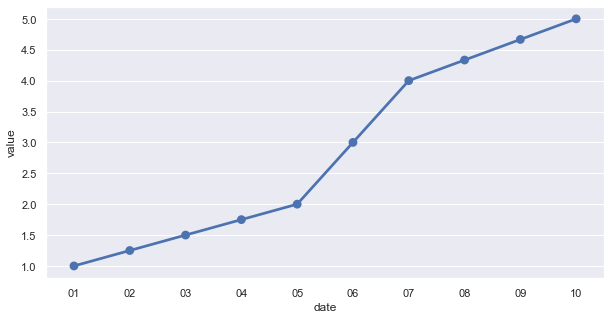

In [15]:
plot_ts_data(df_interpolate)